In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [10]:
df=pd.read_csv('Dataset.csv')
#To know what are the column in the dataset
df.columns

Index(['Table Code', 'State Code', 'District Code', 'Area Name',
       'Total/ Rural/ Urban', 'Age group',
       'Worked for 3 months or more but less than 6 months -  Persons',
       'Worked for 3 months or more but less than 6 months - Males',
       'Worked for 3 months or more but less than 6 months - Females',
       'Worked for less than 3 months - Persons',
       'Worked for less than 3 months - Males',
       'Worked for less than 3 months - Females',
       'Industrial Category - A - Cultivators - Persons',
       'Industrial Category - A - Cultivators - Males',
       'Industrial Category - A - Cultivators - Females',
       'Industrial Category - A - Agricultural labourers - Persons',
       'Industrial Category - A - Agricultural labourers - Males',
       'Industrial Category - A - Agricultural labourers - Females',
       'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
       'Industrial Category - A - Pla

In [11]:
# TO view TOP Five rows in dataset
df.head()

,Table Code,State Code,District Code,Area Name,Total/ Rural/ Urban,Age group,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
0,B0806SC,`33,`000,State - TAMIL NADU,Total,Total,1200828,589003,611825,221386,...,3565,11080,4019,7061,16833,4266,12567,122088,55801,66287
1,B0806SC,`33,`000,State - TAMIL NADU,Total,`5-14,27791,14125,13666,2447,...,11,122,71,51,427,169,258,19305,9774,9531
2,B0806SC,`33,`000,State - TAMIL NADU,Total,15-34,514340,259560,254780,92423,...,1754,7536,2718,4818,8346,2127,6219,68929,32803,36126
3,B0806SC,`33,`000,State - TAMIL NADU,Total,35-59,542581,251957,290624,99202,...,1619,3205,1131,2074,6591,1487,5104,26498,9675,16823
4,B0806SC,`33,`000,State - TAMIL NADU,Total,60+,115103,62833,52270,27165,...,175,211,93,118,1457,483,974,7065,3394,3671


In [12]:
# To view BOTTOM five rows in dataset
df.tail()

,Table Code,State Code,District Code,Area Name,Total/ Rural/ Urban,Age group,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
589,B0806SC,`33,`633,District - Tiruppur,Urban,`5-14,272,129,143,18,...,0,0,0,0,0,0,0,228,104,124
590,B0806SC,`33,`633,District - Tiruppur,Urban,15-34,3285,1654,1631,473,...,20,44,15,29,62,6,56,675,247,428
591,B0806SC,`33,`633,District - Tiruppur,Urban,35-59,3672,1769,1903,522,...,33,35,12,23,36,9,27,279,103,176
592,B0806SC,`33,`633,District - Tiruppur,Urban,60+,696,399,297,111,...,0,3,0,3,10,3,7,81,35,46
593,B0806SC,`33,`633,District - Tiruppur,Urban,Age not stated,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.describe()

,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,Worked for less than 3 months - Males,Worked for less than 3 months - Females,Industrial Category - A - Cultivators - Persons,Industrial Category - A - Cultivators - Males,Industrial Category - A - Cultivators - Females,Industrial Category - A - Agricultural labourers - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
count,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,1.617277e+04,7932.700337,8240.067340,2981.629630,1338.289562,1643.340067,865.117845,466.424242,398.693603,12225.616162,...,48.013468,149.225589,54.127946,95.097643,226.707071,57.454545,169.252525,1644.282828,751.528620,892.754209
std,7.607172e+04,36864.822704,39259.545337,13909.621137,6127.047670,7808.832522,4274.458077,2298.072295,1978.682322,60458.382586,...,222.553500,696.553730,253.067862,444.011425,1039.953069,265.230865,776.206806,7325.241597,3352.811737,3988.125301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.872500e+02,147.250000,144.000000,27.000000,14.250000,13.000000,9.000000,5.000000,4.000000,79.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000,34.000000,30.500000
50%,2.225500e+03,1147.000000,1076.000000,430.000000,198.500000,213.000000,69.500000,35.500000,32.000000,1094.000000,...,2.000000,14.500000,6.000000,6.500000,27.000000,7.500000,20.000000,263.500000,123.000000,135.000000
75%,9.628500e+03,4770.500000,4887.500000,1775.250000,774.250000,946.500000,466.000000,244.250000,204.750000,6279.750000,...,18.000000,99.750000,35.750000,64.000000,126.750000,32.000000,97.500000,994.000000,447.750000,500.000000
max,1.200828e+06,589003.000000,611825.000000,221386.000000,99368.000000,122018.000000,64235.000000,34632.000000,29603.000000,907752.000000,...,3565.000000,11080.000000,4019.000000,7061.000000,16833.000000,4266.000000,12567.000000,122088.000000,55801.000000,66287.000000


In [14]:
#To find how many null values
print(df.isnull().sum())

Table Code                                          0
State Code                                          0
District Code                                       0
Area Name                                           0
Total/ Rural/ Urban                                 0
                                                   ..
Industrial Category - R to U - HHI - Males          0
Industrial Category - R to U - HHI - Females        0
Industrial Category - R to U - Non HHI - Persons    0
Industrial Category - R to U - Non HHI - Males      0
Industrial Category - R to U - Non HHI - Females    0
Length: 69, dtype: int64


In [15]:
#How does the data looks like
print(df.shape)          #Total ROWS and COLUMN
print("\n")
print(df.dtypes)         #to know the data type each column

(594, 69)


Table Code                                          object
State Code                                          object
District Code                                       object
Area Name                                           object
Total/ Rural/ Urban                                 object
                                                     ...  
Industrial Category - R to U - HHI - Males           int64
Industrial Category - R to U - HHI - Females         int64
Industrial Category - R to U - Non HHI - Persons     int64
Industrial Category - R to U - Non HHI - Males       int64
Industrial Category - R to U - Non HHI - Females     int64
Length: 69, dtype: object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 69 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Table Code                                                                                                   594 non-null    object
 1   State Code                                                                                                   594 non-null    object
 2   District Code                                                                                                594 non-null    object
 3   Area Name                                                                                                    594 non-null    object
 4   Total/ Rural/ Urban                                                 

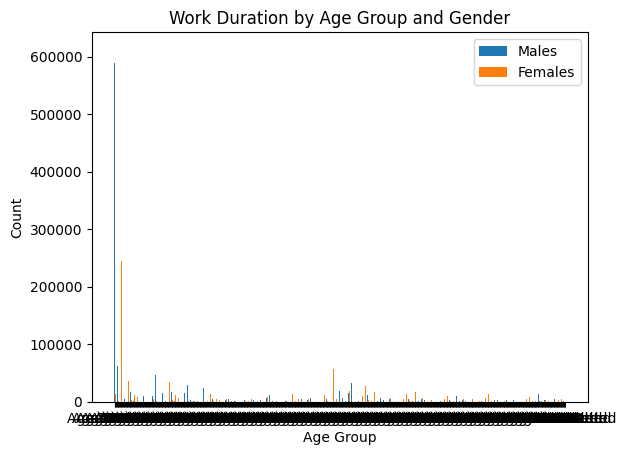

In [17]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with your data
# You can extract the required columns
age_groups = df["Age group"]
males = df["Worked for 3 months or more but less than 6 months - Males"]
females = df["Worked for 3 months or more but less than 6 months - Females"]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the width of the bars
width = 0.25

# Set the positions of the bars on the x-axis
x = range(len(age_groups))

# Create the bars
plt.bar([i + width for i in x], males, width, label='Males')
plt.bar([i + width*2 for i in x], females, width, label='Females')

# Set the x-axis ticks and labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Work Duration by Age Group and Gender')
plt.xticks([i + width for i in x], age_groups)

# Add a legend
plt.legend()

# Show the plot
plt.show()


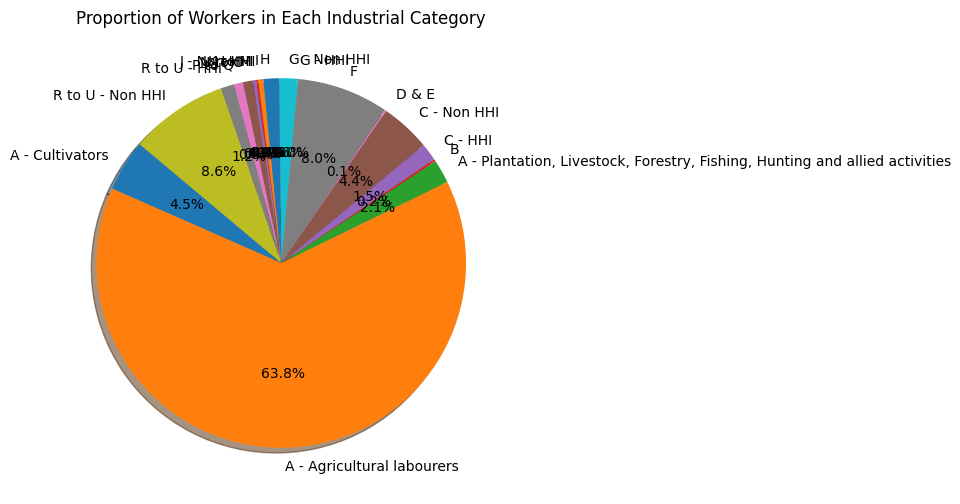

In [18]:
import matplotlib.pyplot as plt

# Define the categories and corresponding column names
categories = ['A - Cultivators', 'A - Agricultural labourers', 'A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities',
               'B', 'C - HHI', 'C - Non HHI', 'D & E', 'F', 'G - HHI', 'G - Non HHI', 'H', 'I', 'J - HHI', 'J - Non HHI', 'K to M',
               'N to O', 'P to Q', 'R to U - HHI', 'R to U - Non HHI']

column_names = ['Industrial Category - A - Cultivators - Persons', 'Industrial Category - A - Agricultural labourers - Persons', 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
               'Industrial Category - B - Persons', 'Industrial Category - C - HHI - Persons', 'Industrial Category - C - Non HHI - Persons', 'Industrial Category - D & E - Persons', 'Industrial Category - F - Persons', 'Industrial Category - G - HHI - Persons', 'Industrial Category - G - Non HHI - Persons', 'Industrial Category - H - Persons', 'Industrial Category - I - Persons', 'Industrial Category - J - HHI - Persons', 'Industrial Category - J - Non HHI - Persons', 'Industrial Category - K to M - Persons',
               'Industrial Category - N to O - Persons', 'Industrial Category - P to Q - Persons', 'Industrial Category - R to U - HHI - Persons', 'Industrial Category - R to U - Non HHI - Persons']

# Extract the data for industrial categories
category_counts = [df[column].sum() for column in column_names]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Workers in Each Industrial Category')

# Display the pie chart
plt.show()


<Axes: xlabel='Worked for 3 months or more but less than 6 months -  Persons'>

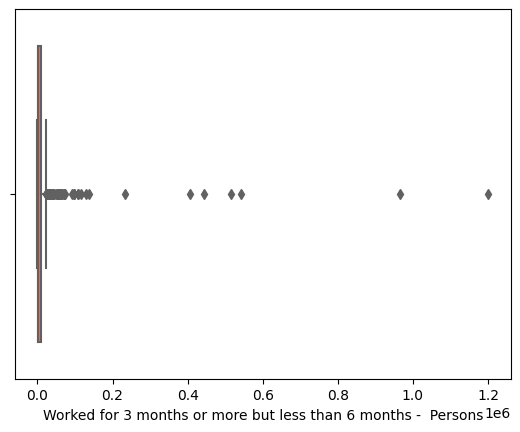

In [9]:
sns.boxplot(df, x='Worked for 3 months or more but less than 6 months -  Persons', palette='Reds')